In [1]:
import sklearn

In [2]:
sklearn.__version__

'0.20.3'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#lab可以不用运行这个魔法命令

from sklearn.tree import DecisionTreeClassifier      #分类树
from sklearn.ensemble import RandomForestClassifier  #随机森林分类器
from sklearn.datasets import load_wine               #红酒数据集
from sklearn.model_selection import train_test_split #训练集和测试集的切分函数

In [4]:
#导入数据集
wine = load_wine() #实例化
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [7]:
#提取特征和标签
wine.data #特征

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [8]:
wine.target #标签

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [9]:
#查看数据集的大小
wine.data.shape

(178, 13)

In [10]:
pd.DataFrame(wine.data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0


In [11]:
#切分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [12]:
Xtrain.shape

(124, 13)

In [13]:
Xtest.shape

(54, 13)

In [14]:
#建立模型
clf = DecisionTreeClassifier(random_state=0) #决策树实例化
rfc = RandomForestClassifier(random_state=0) #随机森林实例化

In [15]:
#用训练集训练模型
clf = clf.fit(Xtrain,Ytrain) #训练决策树
rfc = rfc.fit(Xtrain,Ytrain) #训练随机森林

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [16]:
#查看模型的效果
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

In [17]:
score_c

0.9259259259259259

In [18]:
score_r

0.9629629629629629

In [19]:
# 绘制一组交叉验证
from sklearn.model_selection import cross_val_score #交叉验证包

#随机森林的交叉验证
rfc = RandomForestClassifier(n_estimators=25)  #实例化一个25棵树的森林
rfc_s = cross_val_score(rfc        #评估器
                        ,wine.data #特征矩阵
                        ,wine.target #标签
                        ,cv=10       #交叉验证的折数
                       )#对模型进行十折交叉验证

#决策树的交叉验证
clf = DecisionTreeClassifier() #实例化决策树
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10) #十折交叉验证

In [20]:
rfc_s #随机森林的交叉验证结果

array([1.        , 0.88888889, 0.94444444, 0.94444444, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [21]:
clf_s #决策树的交叉验证结果

array([0.89473684, 0.83333333, 0.77777778, 0.88888889, 0.83333333,
       0.83333333, 1.        , 0.94444444, 0.94117647, 1.        ])

In [22]:
[*range(1,11)] 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

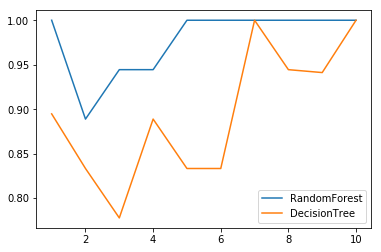

In [23]:
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "DecisionTree")
plt.legend() #显示图例
plt.show()

RandomForest:
0.9722222222222221
DecisionTree:
0.888452442380461


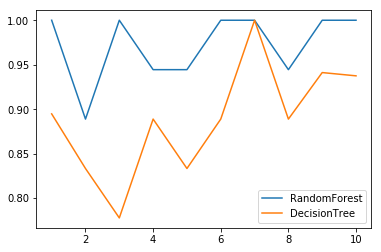

In [24]:
#另一种写法
label = "RandomForest"
for model in [RandomForestClassifier(n_estimators=25),DecisionTreeClassifier()]:
    score = cross_val_score(model,wine.data,wine.target,cv=10)
    print("{}:".format(label)),print(score.mean())
    plt.plot(range(1,11),score,label = label)
    plt.legend()
    label = "DecisionTree"

In [25]:
#绘制十组十折交叉验证
rfc_l = []
clf_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)

In [26]:
len(rfc_l)

10

In [27]:
clf_l

[0.8773413312693499,
 0.894702442380461,
 0.88359133126935,
 0.8717857757137942,
 0.8940079979360165,
 0.88359133126935,
 0.894702442380461,
 0.8940079979360165,
 0.8894392844857242,
 0.8940079979360165]

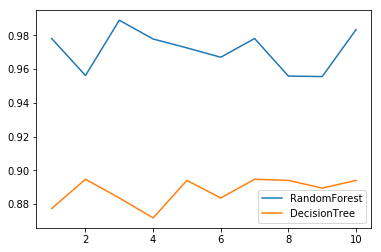

In [28]:
#绘制结果曲线
plt.plot(range(1,11),rfc_l,label = "RandomForest")
plt.plot(range(1,11),clf_l,label = "DecisionTree")
plt.legend()
plt.show()

In [ ]:
# n_estimators的学习曲线
superpa = []   
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

In [ ]:
max(superpa)

In [ ]:
superpa.index(max(superpa))

In [ ]:
a = [1,2,4,6]

In [ ]:
a.index(2)

In [29]:
# 25棵树判断错误的可能性
from scipy.special import comb #排列组合的包

In [30]:
[comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)] #列表推导式

[0.0002927508642776852,
 6.273232805950398e-05,
 1.1500926810909065e-05,
 1.7970198142045413e-06,
 2.378408577623658e-07,
 2.6426761973596196e-08,
 2.4340438659891237e-09,
 1.8255328994918423e-10,
 1.0866267258880016e-11,
 4.939212390400007e-13,
 1.6106127360000022e-14,
 3.355443200000005e-16,
 3.3554432000000048e-18]

In [31]:
sum([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)])

0.0003690480345558283

In [32]:
np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

In [50]:
#随机森林中的random_state控制的是生成森林的模式
rfc = RandomForestClassifier(n_estimators=20,random_state=2)
rfc = rfc.fit(Xtrain, Ytrain)

In [52]:
rfc.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1872583848, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=794921487, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_wei

In [51]:
#重要属性.estimators_
rfc.estimators_[0].random_state

1872583848

In [33]:
for i in range(20):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


In [34]:
#无需划分训练集和测试集
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target) #用全部数据训练模型

In [35]:
#重要属性oob_score_
rfc.oob_score_

0.9606741573033708

In [36]:
#其他参数和接口
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest,Ytest)

1.0

In [37]:
rfc.feature_importances_ #特征重要性

array([0.11824313, 0.04456399, 0.02048536, 0.03392994, 0.03651151,
       0.06434   , 0.18523545, 0.00597846, 0.03514558, 0.14744243,
       0.07161824, 0.1203431 , 0.11616281])

In [38]:
#对于决策树来说，apply返回的是测试集中每个样本坐落在的叶子的索引
rfc.apply(Xtest) #测试集中每个样本坐落在森林中每棵树叶子的索引

array([[13, 11,  5, ...,  5,  5, 13],
       [ 3,  5,  1, ..., 10,  1,  9],
       [ 3,  5,  1, ..., 10,  1,  9],
       ...,
       [13,  3,  5, ...,  5,  5,  3],
       [ 3,  5,  1, ..., 10,  1,  9],
       [15,  3,  5, ..., 15,  5,  3]], dtype=int64)

In [39]:
rfc.apply(Xtest).shape

(54, 25)

In [40]:
Xtest.shape

(54, 13)

In [41]:
rfc.predict(Xtest) #每个样本的预测结果

array([2, 1, 1, 1, 1, 2, 1, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 0, 0, 0, 0, 1, 2, 1, 2])

In [42]:
rfc.predict_proba(Xtest) #每个样本被预测为不同类别的概率

array([[0.  , 0.08, 0.92],
       [0.  , 0.96, 0.04],
       [0.04, 0.96, 0.  ],
       [0.04, 0.88, 0.08],
       [0.  , 1.  , 0.  ],
       [0.  , 0.16, 0.84],
       [0.08, 0.88, 0.04],
       [1.  , 0.  , 0.  ],
       [0.84, 0.16, 0.  ],
       [0.  , 0.44, 0.56],
       [0.  , 0.12, 0.88],
       [0.28, 0.68, 0.04],
       [1.  , 0.  , 0.  ],
       [0.04, 0.  , 0.96],
       [1.  , 0.  , 0.  ],
       [0.  , 0.16, 0.84],
       [1.  , 0.  , 0.  ],
       [0.  , 0.96, 0.04],
       [0.  , 0.88, 0.12],
       [0.  , 1.  , 0.  ],
       [0.84, 0.16, 0.  ],
       [0.12, 0.88, 0.  ],
       [0.04, 0.68, 0.28],
       [0.04, 0.16, 0.8 ],
       [0.  , 1.  , 0.  ],
       [0.16, 0.8 , 0.04],
       [0.  , 0.04, 0.96],
       [0.16, 0.76, 0.08],
       [1.  , 0.  , 0.  ],
       [0.68, 0.2 , 0.12],
       [0.04, 0.04, 0.92],
       [0.  , 0.  , 1.  ],
       [0.  , 0.96, 0.04],
       [0.04, 0.96, 0.  ],
       [0.08, 0.84, 0.08],
       [0.  , 1.  , 0.  ],
       [0.12, 0.88, 0.  ],
 

In [43]:
# bagging的另一个必要条件
x = np.linspace(0,1,20)

In [44]:
x

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [45]:
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13,26)]).sum()
    y.append(E)

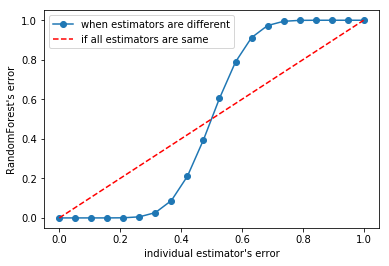

In [46]:
#绘制图形
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()

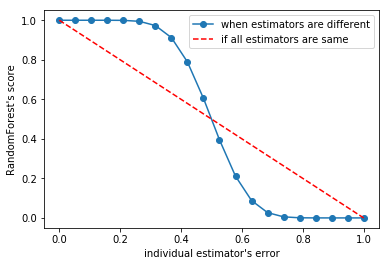

In [49]:
score = [] 
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13,26)]).sum()
    score.append(1-E)
    
#绘制图形
plt.plot(x,score,"o-",label="when estimators are different")
plt.plot(x,1-x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's score")
plt.legend()
plt.show()

### 随机森林回归器

In [53]:
from sklearn.datasets import load_boston             #波士顿房屋数据集
from sklearn.model_selection import cross_val_score  #交叉验证包
from sklearn.ensemble import RandomForestRegressor   #随机森林回归器

In [54]:
boston = load_boston() #实例化数据
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [56]:
boston.data.shape #特征矩阵

(506, 13)

In [57]:
boston.target   #标签（连续数值）

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [60]:
regressor = RandomForestRegressor(n_estimators=100,random_state=0) #实例化随机森林回归器
cross_val_score(regressor, boston.data, boston.target, cv=10
#                 ,scoring = "neg_mean_squared_error"
               )
#如果不设定scoring = "neg_mean_squared_error"，则返回R2

array([ 0.69241975,  0.80040014,  0.32339635,  0.7874838 ,  0.82642804,
        0.76089612,  0.56903709,  0.37099534, -0.58136724,  0.19112288])

In [59]:
#查看所有可以用的评估指标
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

### 实例：用随机森林回归填补缺失值

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston #波士顿房屋数据集
from sklearn.impute import SimpleImputer 
#sklearn中专门用于填补缺失值的包（20版本及以上才可以使用）
from sklearn.ensemble import RandomForestRegressor #随机森林回归器
from sklearn.model_selection import cross_val_score #交叉验证包
from sklearn.model_selection import train_test_split #数据集切分包

In [62]:
#查看原始数据集
dataset = load_boston()

In [110]:
dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [111]:
dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [63]:
dataset.data.shape

(506, 13)

In [64]:
506*13 

6578

In [65]:
pd.DataFrame(dataset.data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [66]:
X_full, y_full = dataset.data, dataset.target

In [67]:
n_samples = X_full.shape[0]   #样本数
n_features = X_full.shape[1]  #特征数

In [68]:
n_samples

506

In [69]:
n_features

13

In [73]:
np.floor(3.9)

3.0

In [74]:
#构建含有缺失值的数据集
rng = np.random.RandomState(0)  #设定随机数种子
missing_rate = 0.5   #缺失值比例
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))

In [75]:
n_missing_samples

3289

In [76]:
missing_features = rng.randint(0,n_features,n_missing_samples)

In [80]:
set(missing_features)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [81]:
missing_samples = rng.randint(0,n_samples,n_missing_samples)

In [83]:
missing_samples[:10]

array([150, 125,  28, 284, 113, 462, 357,  89, 133,  66])

In [84]:
set(missing_samples)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [87]:
X_full[0,0]

0.00632

In [88]:
X_missing = X_full.copy()
y_missing = y_full.copy()

In [91]:
X_missing[missing_samples,missing_features] = np.nan

In [94]:
X_missing = pd.DataFrame(X_missing)

In [100]:
X_missing.isnull().mean(0) #查看每一列缺失值的比例

0     0.395257
1     0.397233
2     0.395257
3     0.401186
4     0.399209
5     0.397233
6     0.365613
7     0.389328
8     0.387352
9     0.389328
10    0.403162
11    0.422925
12    0.373518
dtype: float64

In [101]:
X_missing.isnull().mean(1).max() #计算缺失值最多的行缺失值占比

0.8461538461538461

In [102]:
X_missing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.9,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33


In [103]:
#使用均值进行填补
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean') #实例化缺失值填补包
X_missing_mean = imp_mean.fit_transform(X_missing)

In [106]:
pd.DataFrame(X_missing_mean).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.627579,18.000000,11.163464,0.066007,0.538000,6.305921,65.2,4.090000,1.000000,296.000000,18.521192,352.741952,4.980000
1,0.027310,0.000000,11.163464,0.000000,0.469000,6.305921,78.9,4.967100,2.000000,405.935275,18.521192,396.900000,9.140000
2,0.027290,10.722951,7.070000,0.000000,0.564128,7.185000,61.1,3.856371,2.000000,242.000000,18.521192,352.741952,12.991767
3,3.627579,10.722951,11.163464,0.000000,0.458000,6.305921,45.8,3.856371,9.383871,222.000000,18.700000,352.741952,12.991767
4,3.627579,0.000000,2.180000,0.000000,0.564128,7.147000,67.4,3.856371,9.383871,405.935275,18.700000,352.741952,5.330000


In [107]:
#使用0进行填补
imp_0 = SimpleImputer(missing_values=np.nan, strategy="constant",fill_value=0)
X_missing_0 = imp_0.fit_transform(X_missing)

In [109]:
pd.DataFrame(X_missing_0).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00000,18.0,0.00,0.0,0.538,0.000,65.2,4.0900,1.0,296.0,0.0,0.0,4.98
1,0.02731,0.0,0.00,0.0,0.469,0.000,78.9,4.9671,2.0,0.0,0.0,396.9,9.14
2,0.02729,0.0,7.07,0.0,0.000,7.185,61.1,0.0000,2.0,242.0,0.0,0.0,0.00
3,0.00000,0.0,0.00,0.0,0.458,0.000,45.8,0.0000,0.0,222.0,18.7,0.0,0.00
4,0.00000,0.0,2.18,0.0,0.000,7.147,0.0,0.0000,0.0,0.0,18.7,0.0,5.33


In [112]:
#使用随机森林回归器填补缺失值
X_missing_reg = X_missing.copy()
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values

In [113]:
X_missing_reg.isnull().sum(axis=0)

0     200
1     201
2     200
3     203
4     202
5     201
6     185
7     197
8     196
9     197
10    204
11    214
12    189
dtype: int64

In [114]:
np.argsort([3,5,2,7])

array([2, 0, 1, 3], dtype=int64)

In [116]:
np.argsort(X_missing_reg.isnull().sum(axis=0)).values

array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11], dtype=int64)

In [119]:
#以第6列为例
i = sortindex[0] #特征的索引

In [121]:
df = X_missing_reg
fillc = df.iloc[:,i] #提取标签

In [124]:
#构建新的特征矩阵（包含两部分：除了i列之外所有的特征+原来的标签）
df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)

In [126]:
df.head()

,0,1,2,3,4,5,7,8,9,10,11,12,0
0,NaN,18.0,NaN,NaN,0.538,NaN,4.0900,1.0,296.0,NaN,NaN,4.98,24.0
1,0.02731,0.0,NaN,0.0,0.469,NaN,4.9671,2.0,NaN,NaN,396.9,9.14,21.6
2,0.02729,NaN,7.07,0.0,NaN,7.185,NaN,2.0,242.0,NaN,NaN,NaN,34.7
3,NaN,NaN,NaN,0.0,0.458,NaN,NaN,NaN,222.0,18.7,NaN,NaN,33.4
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,18.7,NaN,5.33,36.2


In [127]:
#在新特征矩阵中，对含有缺失值的列，进行0的填补
df_0 =SimpleImputer(missing_values=np.nan,
                    strategy='constant',fill_value=0).fit_transform(df)

In [129]:
df_0.shape

(506, 13)

In [137]:
#提取训练集和测试集
Ytrain = fillc[~fillc.isnull()]
Ytest = fillc[fillc.isnull()]

In [139]:
Ytrain.index #训练集的行索引

Int64Index([  0,   1,   2,   3,   5,   6,   7,  11,  12,  13,
            ...
            495, 496, 497, 498, 499, 500, 501, 502, 503, 504],
           dtype='int64', length=321)

In [143]:
Xtrain = df_0[Ytrain.index,:]
Xtest = df_0[Ytest.index,:]

In [144]:
#用随机森林回归来填补缺失值
rfc = RandomForestRegressor(n_estimators=100)
rfc = rfc.fit(Xtrain, Ytrain)
Ypredict = rfc.predict(Xtest)
Ypredict

array([62.098, 78.754, 66.599, 65.646, 73.602, 63.339, 80.34 , 78.367,
       92.962, 89.83 , 52.056, 56.14 , 82.283, 67.05 , 55.17 , 39.894,
       31.907, 31.915, 52.975, 52.853, 40.782, 42.91 , 27.028, 46.045,
       39.503, 56.788, 40.933, 62.204, 44.784, 47.812, 59.701, 56.337,
       58.372, 71.029, 84.317, 75.518, 80.684, 76.51 , 86.828, 75.353,
       58.936, 89.868, 77.4  , 91.46 , 87.385, 85.623, 87.249, 95.312,
       88.978, 95.098, 89.349, 96.454, 86.707, 94.887, 88.158, 88.529,
       91.193, 94.268, 89.918, 95.225, 82.937, 70.509, 67.352, 64.778,
       57.747, 64.369, 45.119, 66.82 , 59.826, 64.006, 33.518, 29.422,
       23.172, 56.456, 70.468, 77.651, 79.221, 64.595, 61.631, 68.675,
       63.08 , 66.058, 58.317, 47.126, 52.019, 30.908, 26.717, 55.91 ,
       55.33 , 31.582, 25.231, 31.909, 50.767, 23.912, 37.046, 79.703,
       89.246, 88.11 , 88.871, 88.355, 76.638, 55.015, 30.683, 47.345,
       49.178, 35.922, 27.927, 27.878, 34.841, 34.801, 41.32 , 36.899,
      

In [145]:
#将填补好的特征返回到我们的原始的特征矩阵中
# X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i] = Ypredict

In [146]:
X_missing_reg = X_missing.copy()
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values

for i in sortindex:
    #构建我们的新特征矩阵和新标签
    df = X_missing_reg
    fillc = df.iloc[:,i]
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)
    
    #在新特征矩阵中，对含有缺失值的列，进行0的填补
    df_0 =SimpleImputer(missing_values=np.nan,
                        strategy='constant',fill_value=0).fit_transform(df)
    
    #找出我们的训练集和测试集
    Ytrain = fillc[fillc.notnull()]
    Ytest = fillc[fillc.isnull()]
    Xtrain = df_0[Ytrain.index,:]
    Xtest = df_0[Ytest.index,:]
    
    #用随机森林回归来填补缺失值
    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(Xtrain, Ytrain)
    Ypredict = rfc.predict(Xtest)
    
    #将填补好的特征返回到我们的原始的特征矩阵中
    X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i] = Ypredict

In [148]:
X_missing_reg.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.188453,18.00,6.2221,0.11,0.538000,6.64654,65.200,4.090000,1.00,296.00,18.112,389.9788,4.9800
1,0.027310,0.00,6.2054,0.00,0.469000,6.15825,78.900,4.967100,2.00,293.52,18.120,396.9000,9.1400
2,0.027290,15.68,7.0700,0.00,0.464088,7.18500,61.100,4.127690,2.00,242.00,17.913,391.4968,4.7651
3,0.094033,18.92,2.7137,0.00,0.458000,6.90950,45.800,4.736507,3.61,222.00,18.700,393.1476,5.6816
4,0.091178,0.00,2.1800,0.00,0.466788,7.14700,58.906,4.250674,3.84,240.07,18.700,393.0862,5.3300


In [149]:
#对所有数据进行建模，取得MSE结果
X = [X_full,X_missing_mean,X_missing_0,X_missing_reg]
mse = []
std = []
for x in X:
    estimator = RandomForestRegressor(random_state=0, n_estimators=100)
    scores =cross_val_score(estimator,x,y_full
                            ,scoring='neg_mean_squared_error',cv=5).mean()
    mse.append(scores * -1)

In [150]:
mse

[21.62860460743544, 40.84405476955929, 49.50657028893417, 19.69535739029314]

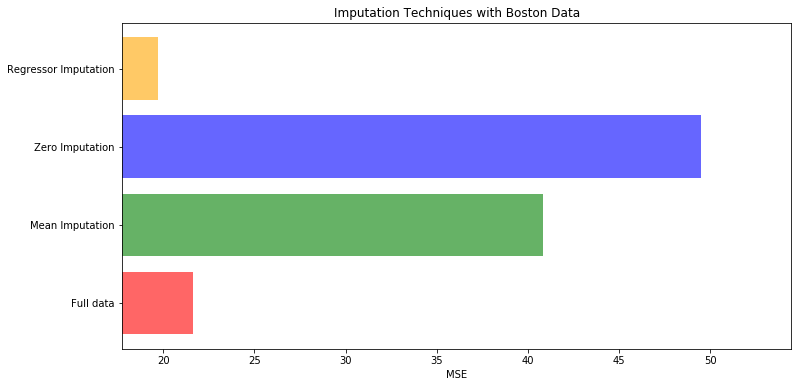

In [151]:
x_labels = ['Full data',
            'Mean Imputation',
            'Zero Imputation',
            'Regressor Imputation'] #建立标签列表
colors = ['r', 'g', 'b', 'orange'] #颜色列表

plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
for i in np.arange(len(mse)):
    ax.barh(i, mse[i],color=colors[i], alpha=0.6, align='center')

#对条形图进行装饰
ax.set_title('Imputation Techniques with Boston Data') #设定图表标题
ax.set_xlim(left=np.min(mse) * 0.9,
            right=np.max(mse) * 1.1) #设定X轴刻度范围
ax.set_yticks(np.arange(len(mse))) #设定Y轴刻度
ax.set_xlabel('MSE') #设定X轴标签
ax.set_yticklabels(x_labels) #设定Y轴刻度标签
plt.show()

### AdaBoostClassifier实战

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import AdaBoostClassifier  #adaboost分类器
from sklearn.tree import DecisionTreeClassifier  #决策树分类器
from sklearn.datasets import make_gaussian_quantiles #创造数据集的包

In [2]:
# 生成2维正态分布，生成的数据按分位数分为两类，500个样本,2个样本特征，协方差系数为2
X1, y1 = make_gaussian_quantiles(cov=2.0,n_samples=500,
                                 n_features=2,n_classes=2, random_state=1)

In [3]:
X1.shape

(500, 2)

In [4]:
np.unique(y1) #标签去重

array([0, 1])

In [5]:
# 生成2维正态分布，生成的数据按分位数分为两类，400个样本,2个样本特征均值都为3，协方差系数为1.5
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,n_samples=400,
                                 n_features=2, n_classes=2, random_state=1)

In [6]:
X2.shape

(400, 2)

In [7]:
X2.mean(0)

array([3.03247236, 3.04035555])

In [8]:
np.unique(y2)

array([0, 1])

In [9]:
#将两组数据合成一组数据
X = np.concatenate((X1, X2))

In [10]:
X.shape

(900, 2)

In [11]:
y = np.concatenate((y1, - y2 + 1))

In [12]:
y.shape

(900,)

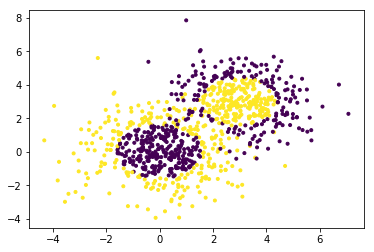

In [13]:
plt.scatter(X[:, 0], X[:, 1], marker='.', c=y);

In [14]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,
                        min_samples_split=20,
                        min_samples_leaf=5)
                        ,algorithm="SAMME",n_estimators=200, learning_rate=0.8)
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.8, n_estimators=200, random_state=None)

In [15]:
print("Score:" ,bdt.score(X,y))

Score: 0.9133333333333333


In [16]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [17]:
len(np.arange(x_min, x_max, 0.02))

670

In [18]:
len(np.arange(y_min, y_max, 0.02))

690

In [19]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [20]:
xx.shape

(690, 670)

In [21]:
yy.shape

(690, 670)

In [26]:
len(xx.ravel())

462300

In [28]:
np.c_[xx.ravel(), yy.ravel()].shape

(462300, 2)

In [29]:
Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()]) #对46w个点进行预测

In [31]:
len(Z)

462300

In [32]:
np.unique(Z)

array([0, 1])

In [34]:
Z.shape

(462300,)

In [35]:
Z = Z.reshape(xx.shape) #更改形状

In [36]:
Z.shape

(690, 670)

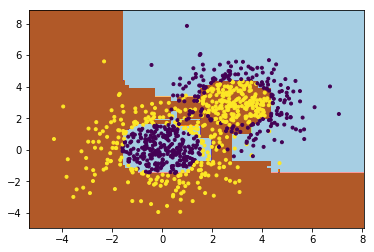

In [39]:
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], marker='.', c=y)
plt.show()

In [40]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [41]:
np.arange(x_min, x_max, 0.02).shape

(670,)

In [42]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [43]:
xx.shape

(690, 670)

In [44]:
yy.shape

(690, 670)

In [45]:
a,b=np.meshgrid([1,2,3],[7,8])

In [46]:
a

array([[1, 2, 3],
       [1, 2, 3]])

In [47]:
b

array([[7, 7, 7],
       [8, 8, 8]])

In [48]:
670*690

462300

In [49]:
np.c_[xx.ravel(), yy.ravel()].shape

(462300, 2)

In [50]:
Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [51]:
Z.shape

(690, 670)

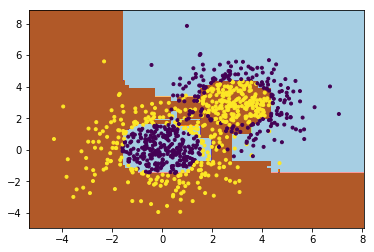

In [52]:
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], marker='.', c=y)
plt.show()

In [53]:
bdt.score(X,y) #模型预测的准确率

0.9133333333333333

In [54]:
#将弱分类器的数量由200增加为300
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,
                        min_samples_split=20,
                        min_samples_leaf=5)
                        ,algorithm="SAMME", n_estimators=300,
                        learning_rate=0.8)
bdt.fit(X, y)
print("Score:" ,bdt.score(X,y))

Score: 0.9622222222222222


In [55]:
#将步长由0.8降为0.5
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,
                            min_samples_split=20,
                            min_samples_leaf=5)
                            ,algorithm="SAMME",n_estimators=300, learning_rate=0.5)
bdt.fit(X, y)
print("Score:" ,bdt.score(X,y))

Score: 0.8944444444444445


In [56]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,
                        min_samples_split=20,
                        min_samples_leaf=5)
                        ,algorithm="SAMME",n_estimators=700, learning_rate=0.7)
bdt.fit(X, y)
print("Score:", bdt.score(X,y))

Score: 0.9688888888888889


### Adaboost回归器

In [58]:
#导入所需的模块和包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor as DTR  #决策树回归器
from sklearn.ensemble import AdaBoostRegressor as ABR #adaboost回归器

In [63]:
np.linspace(0, 6, 100).reshape(1,-1)
# 1在行的位置就把数据变为一行，
# 1在列的位置就把数据变为一列
# -1用来占位

array([[0.        , 0.06060606, 0.12121212, 0.18181818, 0.24242424,
        0.3030303 , 0.36363636, 0.42424242, 0.48484848, 0.54545455,
        0.60606061, 0.66666667, 0.72727273, 0.78787879, 0.84848485,
        0.90909091, 0.96969697, 1.03030303, 1.09090909, 1.15151515,
        1.21212121, 1.27272727, 1.33333333, 1.39393939, 1.45454545,
        1.51515152, 1.57575758, 1.63636364, 1.6969697 , 1.75757576,
        1.81818182, 1.87878788, 1.93939394, 2.        , 2.06060606,
        2.12121212, 2.18181818, 2.24242424, 2.3030303 , 2.36363636,
        2.42424242, 2.48484848, 2.54545455, 2.60606061, 2.66666667,
        2.72727273, 2.78787879, 2.84848485, 2.90909091, 2.96969697,
        3.03030303, 3.09090909, 3.15151515, 3.21212121, 3.27272727,
        3.33333333, 3.39393939, 3.45454545, 3.51515152, 3.57575758,
        3.63636364, 3.6969697 , 3.75757576, 3.81818182, 3.87878788,
        3.93939394, 4.        , 4.06060606, 4.12121212, 4.18181818,
        4.24242424, 4.3030303 , 4.36363636, 4.42

In [64]:
#创造数据集
rng = np.random.RandomState(1)  #设定随机数种子
X = np.linspace(0, 6, 100).reshape(-1,1)

In [66]:
X.shape[0]

100

In [69]:
rng.normal(0, 0.1, X.shape[0])

array([-4.00878192e-02,  8.24005618e-02, -5.62305431e-02,  1.95487808e-01,
       -1.33195167e-01, -1.76068856e-01, -1.65072127e-01, -8.90555584e-02,
       -1.11911540e-01,  1.95607890e-01, -3.26499498e-02, -1.34267579e-01,
        1.11438298e-01, -5.86523939e-02, -1.23685338e-01,  8.75838928e-02,
        6.23362177e-02, -4.34956683e-02,  1.40754000e-01,  1.29101580e-02,
        1.61694960e-01,  5.02740882e-02,  1.55880554e-01,  1.09402696e-02,
       -1.21974440e-01,  2.44936865e-01, -5.45774168e-02, -1.98837863e-02,
       -7.00398505e-02, -2.03394449e-02,  2.42669441e-02,  2.01830179e-02,
        6.61020288e-02,  1.79215821e-01, -1.20464572e-02, -1.23312074e-01,
       -1.18231813e-01, -6.65754518e-02, -1.67419581e-01,  8.25029824e-02,
       -4.98213564e-02, -3.10984978e-02, -1.89148284e-04, -1.39662042e-01,
       -8.61316361e-02,  6.74711526e-02,  6.18539131e-02, -4.43171931e-02,
        1.81053491e-01, -1.30572692e-01, -3.44987210e-02, -2.30839743e-02,
       -2.79308500e-01,  

In [70]:
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])
#rng.normal(0, 0.1, X.shape[0])作用是人为增加噪音

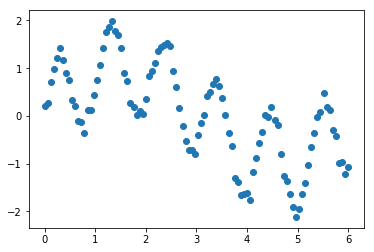

In [72]:
plt.scatter(X,y); #绘制数据集的可视化图形

In [73]:
#实例化回归模型
regr_1 = DTR(max_depth=4) #实例化最大树深为4的决策树
regr_2 = ABR(DecisionTreeRegressor(max_depth=4),
                            n_estimators=300, random_state=rng)

In [74]:
#训练模型
regr_1.fit(X, y)
regr_2.fit(X, y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=<mtrand.RandomState object at 0x000000000D9D75A0>)

In [75]:
#预测结果
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

In [76]:
y_1

array([ 0.84802792,  0.84802792,  0.84802792,  0.84802792,  0.84802792,
        0.84802792,  0.84802792,  0.84802792,  0.84802792,  0.15394304,
        0.15394304,  0.15394304,  0.15394304,  0.15394304,  0.15394304,
        0.15394304,  0.15394304,  0.15394304,  1.62262861,  1.62262861,
        1.62262861,  1.62262861,  1.62262861,  1.62262861,  1.62262861,
        1.62262861,  0.7976805 ,  0.7976805 ,  0.7976805 ,  0.7976805 ,
        0.7976805 ,  0.7976805 ,  0.7976805 ,  0.7976805 ,  0.7976805 ,
        0.7976805 ,  0.7976805 ,  0.7976805 ,  0.7976805 ,  0.7976805 ,
        0.7976805 ,  0.7976805 ,  0.7976805 ,  0.7976805 ,  0.15837016,
       -0.43572531, -0.43572531, -0.43572531, -0.43572531, -0.43572531,
       -0.43572531, -0.43572531, -0.43572531,  0.5601628 ,  0.5601628 ,
        0.5601628 ,  0.5601628 ,  0.5601628 ,  0.5601628 ,  0.02332175,
       -1.23774273, -1.23774273, -1.23774273, -1.23774273, -1.23774273,
       -1.23774273, -1.23774273, -1.23774273, -1.23774273, -1.23

In [77]:
y_2

array([ 0.43571721,  0.43571721,  0.53836698,  0.94078413,  1.04454669,
        1.04707083,  1.04707083,  1.0020783 ,  0.75866733,  0.34460058,
        0.32806717,  0.07618567, -0.09086117, -0.09731632, -0.0872111 ,
        0.3032454 ,  0.5252935 ,  0.75114249,  1.13736505,  1.24324183,
        1.57741781,  1.73153231,  1.73313862,  1.73313862,  1.59233919,
        1.42176511,  0.89964054,  0.81671296,  0.46317442,  0.28148342,
        0.24854073,  0.24854073,  0.27543191,  0.27543191,  0.71887933,
        0.82621698,  0.9084969 ,  1.11615566,  1.18628323,  1.22741555,
        1.22741555,  1.22741555,  0.95821261,  0.61418988,  0.15837016,
       -0.13621185, -0.34304691, -0.43481916, -0.53199589, -0.52634505,
       -0.51721285, -0.13621185,  0.03007176,  0.37277678,  0.42072336,
        0.51958486,  0.53782174,  0.53782174,  0.17557568, -0.1039435 ,
       -0.36735363, -0.62286325, -1.20071345, -1.27244953, -1.36933071,
       -1.45515481, -1.45515481, -1.45515481, -1.43908414, -0.80

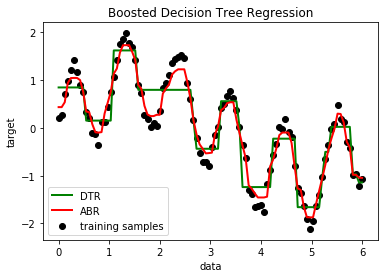

In [80]:
#绘制可视化图形
plt.figure() #创建画布
plt.scatter(X, y, c="k", label="training samples") #数据的散点图
plt.plot(X, y_1, c="g", label="DTR", linewidth=2) #回归树拟合曲线
plt.plot(X, y_2, c="r", label="ABR", linewidth=2) #ABR回归器拟合曲线
#图形装饰
plt.xlabel("data")   #X轴标签
plt.ylabel("target") #Y轴标签
plt.title("Boosted Decision Tree Regression") #图表标题
plt.legend(loc=3) #显示图例
plt.show()

In [82]:
%pwd
#查看当前文件夹路径

'C:\\Users\\CDA\\Desktop\\63期就业班_机器学习\\data&code'

### 随机森林的调参

In [84]:
from sklearn.datasets import load_breast_cancer      #乳腺癌数据集
from sklearn.ensemble import RandomForestClassifier  #随机森林分类器
from sklearn.model_selection import GridSearchCV     #带交叉验证的网格搜索
from sklearn.model_selection import cross_val_score  #交叉验证
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
data = load_breast_cancer()

In [86]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [87]:
data.data #特征

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [88]:
data.data.shape

(569, 30)

In [90]:
pd.DataFrame(data.data).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [92]:
data.target #标签

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [93]:
#简单建模
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score_pre

0.9666925935528475

最高score: 0.9684480598046841
最优n_estimators: 41


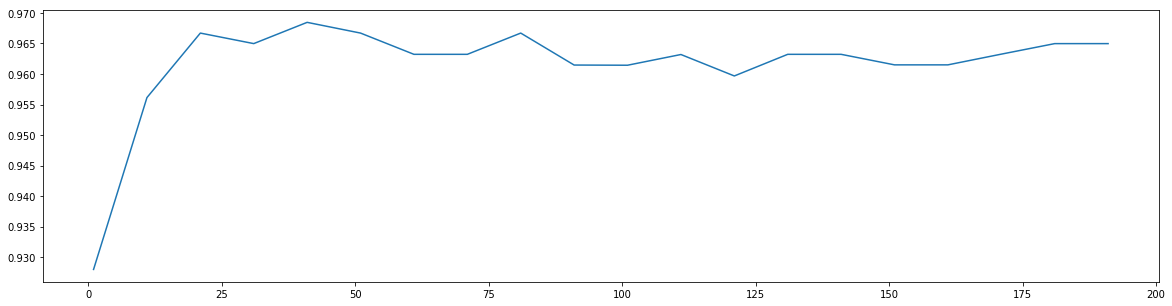

In [94]:
#调整森林规模参数

scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
    
#打印出最高score和最优n_estimators，并绘制学习曲线
print('最高score:',max(scorel))
print('最优n_estimators:',(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

0.9719568317345088 39


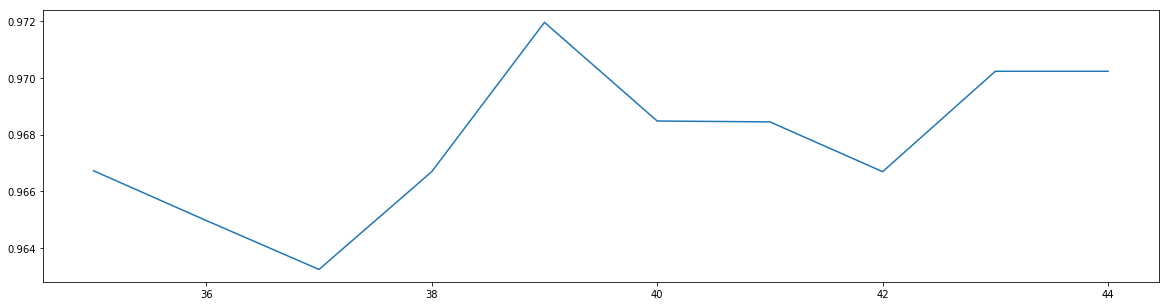

In [95]:
scorel = []
for i in range(35,45):
    rfc = RandomForestClassifier(n_estimators=i,random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(35,45)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(35,45),scorel)
plt.show()

In [96]:
0.9719568317345088 - 0.9666925935528475

0.005264238181661218

In [98]:
#调整max_depth
param_grid = {'max_depth':np.arange(1, 20, 1)}
# 一般根据数据的大小来进行一个试探，乳腺癌数据很小，所以可以采用1~10，或者1~20这样的试探
# 但对于像digit recognition那样的大型数据来说，我们应该尝试30~50层深度（或许还不足够
# 更应该画出学习曲线，来观察深度对模型的影响
rfc = RandomForestClassifier(n_estimators=39,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=39, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [99]:
GS.best_params_ #网格搜索得到的最优参数

{'max_depth': 11}

In [100]:
GS.best_score_  #模型的最高准确率

0.9718804920913884

In [101]:
#调整max_features
param_grid = {'max_features':np.arange(5,30,1)}
rfc = RandomForestClassifier(n_estimators=39,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=39, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [102]:
GS.best_params_

{'max_features': 5}

In [103]:
GS.best_score_

0.9718804920913884

In [104]:
#调整min_samples_leaf
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}
#对于min_samples_split和min_samples_leaf,一般是从他们的最小值开始向上增加10或20
#面对高维度高样本量数据，如果不放心，也可以直接+50，对于大型数据，可能需要200~300的范围
#如果调整的时候发现准确率无论如何都上不来，那可以放心大胆调一个很大的数据，大力限制模型的复杂度
rfc = RandomForestClassifier(n_estimators=39,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=39, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [105]:
GS.best_params_

{'min_samples_leaf': 1}

In [106]:
GS.best_score_

0.9718804920913884

In [107]:
#调整min_samples_split
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
rfc = RandomForestClassifier(n_estimators=39,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=39, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [108]:
GS.best_params_

{'min_samples_split': 2}

In [109]:
GS.best_score_

0.9718804920913884

In [110]:
#调整Criterion
param_grid = {'criterion':['gini', 'entropy']}
rfc = RandomForestClassifier(n_estimators=39,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=39, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [111]:
GS.best_params_

{'criterion': 'gini'}

In [112]:
GS.best_score_

0.9718804920913884

In [113]:
#最佳模型参数
rfc = RandomForestClassifier(n_estimators=39,random_state=90)
score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score

0.9719568317345088

In [114]:
score - score_pre

0.005264238181661218